<a href="https://colab.research.google.com/github/Waleed-Azam/1D-CNN/blob/master/Individual_1D_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
# univariate cnn example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

In [144]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np 
import matplotlib.pyplot as plt

In [145]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [146]:
downloaded = drive.CreateFile({'id':'1SMVsx16dr3-HB7HhwebXoTYiUrU-nTNA'}) # replace the id with id of file you want to access'}) # replace the id with id of file you want to access
#https://drive.google.com/file/d/1agv3WTJF7GiaUwWJGDpDQfZwX_nApM-J/view?usp=sharing
#https://drive.google.com/file/d/14RfDnc5maSGzxripjhH3Z6B2asdpFbbX/view?usp=sharing
#https://drive.google.com/file/d/11eCGs8j8V8bBFZBwT1nNvrGzdrQVmhWE/view?usp=sharing
#DVL1______C_8000
#https://drive.google.com/file/d/1SMVsx16dr3-HB7HhwebXoTYiUrU-nTNA/view?usp=sharing

In [147]:
downloaded.GetContentFile('Sintef_NTNU.csv')

In [148]:
import pandas as pd
df2 = pd.read_csv('Sintef_NTNU.csv') 
df2

,Time,DVL1_S,DVL2_S,DVL3_S,DVL4_S,DVL1,DVL2,DVL3,DVL4,ROV6DOF,ROV6DOF.1,ROV6DOF.2,ROV6DOF.3,ROV6DOF.4,ROV6DOF.5,AutoHeading
0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00,0.0000
1,0.0,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00,0.0000
2,0.1,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00,0.0000
3,0.2,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00,0.0000
4,0.3,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.00,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84986,8498.5,2.692643,1.8,2.620548,2.615895,2.692643,2.628101,2.620548,2.615895,0.000980,-0.000342,0.0110,0.000017,-0.001540,-3.32,0.0646
84987,8498.6,2.692682,1.8,2.620243,2.615925,2.692682,2.629319,2.620243,2.615925,0.000990,-0.000342,0.0230,0.000031,-0.001380,-3.32,0.0643
84988,8498.7,2.692715,1.8,2.619866,2.615951,2.692715,2.630637,2.619866,2.615951,0.001010,-0.000342,0.0392,0.000051,-0.001220,-3.32,0.0641
84989,8498.8,2.692740,1.8,2.619450,2.615970,2.692740,2.631916,2.619450,2.615970,0.001040,-0.000342,0.0595,0.000075,-0.001060,-3.32,0.0632


In [149]:
df2.head()

,Time,DVL1_S,DVL2_S,DVL3_S,DVL4_S,DVL1,DVL2,DVL3,DVL4,ROV6DOF,ROV6DOF.1,ROV6DOF.2,ROV6DOF.3,ROV6DOF.4,ROV6DOF.5,AutoHeading
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.1,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.3,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
df2["DVL1"] = df2["DVL1"].fillna(0)
df2["DVL2"] = df2["DVL2"].fillna(0)
df2["DVL3"] = df2["DVL3"].fillna(0)
df2["DVL4"] = df2["DVL4"].fillna(0)

**Considering Only Beam 1**

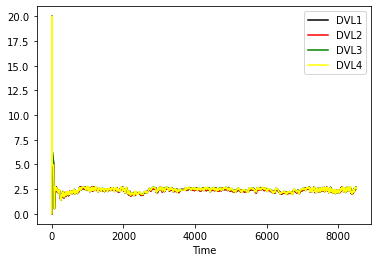

In [151]:
ax = plt.gca()

df2.plot(kind='line',x='Time',y='DVL1', color='black', ax=ax)
df2.plot(kind='line',x='Time',y='DVL2', color='red', ax=ax)
df2.plot(kind='line',x='Time',y='DVL3', color='green', ax=ax)
df2.plot(kind='line',x='Time',y='DVL4', color='yellow', ax=ax)

plt.show()

**Ground Truth for the Beam 1**

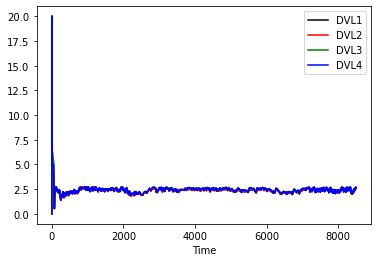

In [290]:
ax = plt.gca()

df2.plot(kind='line',x='Time',y='DVL1', color='black', ax=ax)
df2.plot(kind='line',x='Time',y='DVL2', color='red', ax=ax)
df2.plot(kind='line',x='Time',y='DVL3', color='green', ax=ax)
df2.plot(kind='line',x='Time',y='DVL4', color='blue', ax=ax)

plt.show()

**Set of features**

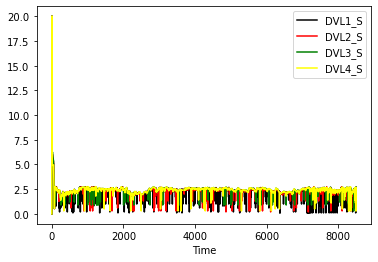

In [291]:
ax = plt.gca()

df2.plot(kind='line',x='Time',y='DVL1_S', color='black', ax=ax)
df2.plot(kind='line',x='Time',y='DVL2_S', color='red', ax=ax)
df2.plot(kind='line',x='Time',y='DVL3_S', color='green', ax=ax)
df2.plot(kind='line',x='Time',y='DVL4_S', color='yellow', ax=ax)

plt.show()

In [154]:
#Need to improve the working and need
import numpy as np

In [155]:
t=df2['Time']
Label=df2['DVL1']
y=np.array( Label)
X=df2['DVL1_S']
X=np.array(X)
import numpy as np

In [156]:
def split_sequence(sequence, n_steps):
	X, z = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_z = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		z.append(seq_z)
	return array(X), array(z)

In [157]:
X

array([ 0.      , 20.      , 20.      , ...,  2.692715,  2.69274 ,
        2.692755])

In [158]:
scaled_data=X

In [159]:
X.shape

(84991,)

In [160]:
# define input sequence
raw_seq = X
# choose a number of time steps
n_steps = 20
# split into samples
X, z = split_sequence(raw_seq, n_steps)

In [161]:
X.shape

(84971, 20)

In [162]:
X.shape[1]

20

In [163]:
X.shape[0]

84971

In [164]:
X.shape

(84971, 20)

In [165]:
X, z = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [166]:
X.shape

(84971, 20, 1)

**Defing the label in to the features**

In [167]:
z

array([20.      , 20.      , 20.      , ...,  2.692715,  2.69274 ,
        2.692755])

In [168]:
z.shape

(84971,)

In [169]:
len(Label)

84991

In [170]:
n_steps=20

In [171]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	Label, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		Label.append(seq_x)
		y.append(seq_y)
	return array(Label), array(y)

In [172]:
# define input sequence
raw_seq = Label
# choose a number of time steps
n_steps = 20
# split into samples
Label, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
Label = Label.reshape((Label.shape[0], Label.shape[1], n_features))

In [173]:
Label.shape

(84971, 20, 1)

In [174]:
y.shape

(84971,)

In [175]:
X_train  = np.array(X[:5000])
y_train = np.array(y[:5000])

X_test = np.array(X[4000:])
y_test = np.array(y[4000:])

In [176]:
print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (5000, 20, 1)
y_train size: (5000,)
X_test size: (80971, 20, 1)
y_test size: (80971,)


In [177]:
dates = df2['Time']
train_date = dates[:45000]
test_date = dates[-80971:]

In [178]:
X = X_train
y = y_train

In [179]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [180]:
history=model.fit(X, y, epochs=200, verbose=1)

Epoch 1/200
5000/5000 [==============================] - 1s 251us/step - loss: 0.4051
Epoch 2/200
5000/5000 [==============================] - 1s 185us/step - loss: 0.1509
Epoch 3/200
5000/5000 [==============================] - 1s 175us/step - loss: 0.1250
Epoch 4/200
5000/5000 [==============================] - 1s 178us/step - loss: 0.0642
Epoch 5/200
5000/5000 [==============================] - 1s 203us/step - loss: 0.0386
Epoch 6/200
5000/5000 [==============================] - 1s 177us/step - loss: 0.0408
Epoch 7/200
5000/5000 [==============================] - 1s 182us/step - loss: 0.0315
Epoch 8/200
5000/5000 [==============================] - 1s 199us/step - loss: 0.0826
Epoch 9/200
5000/5000 [==============================] - 1s 171us/step - loss: 0.0654
Epoch 10/200
5000/5000 [==============================] - 1s 178us/step - loss: 0.0263
Epoch 11/200
5000/5000 [==============================] - 1s 173us/step - loss: 0.0206
Epoch 12/200
5000/5000 [============================

In [181]:

#Prediction 
# demonstrate prediction
import math
y_pred=[]
for i in X_test:
    
    x_input = i
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    y_pred.append(float(yhat[0]))

# import numpy as np
# yp = list(np.around(np.array(y_pred),1))
# yt = list(np.around((y_test),1))
    
# y_pred = [ '%.1f' % elem for elem in y_pred ]
# y_test = [ '%.1f' % elem for elem in y_pred ]

In [182]:
print(y_pred)
print(y_test)

[2.120303153991699, 2.12239933013916, 2.1250483989715576, 2.1275382041931152, 2.1298162937164307, 2.1321144104003906, 2.1342508792877197, 2.13611102104187, 2.137864828109741, 2.139295816421509, 2.1405375003814697, 2.1416361331939697, 2.1425278186798096, 2.143401861190796, 2.1441636085510254, 2.1449661254882812, 2.145714521408081, 2.1464810371398926, 2.1471006870269775, 2.1479427814483643, 2.148699998855591, 2.1494357585906982, 2.1501379013061523, 2.1507935523986816, 2.1514031887054443, 2.151970148086548, 2.152495861053467, 2.1529815196990967, 2.1534316539764404, 2.1538779735565186, 2.1542391777038574, 2.1546108722686768, 2.154942274093628, 2.155240774154663, 2.155494451522827, 2.155745267868042, 2.15600323677063, 2.1562135219573975, 2.156419277191162, 2.1566343307495117, 2.1568124294281006, 2.1569900512695312, 2.1571907997131348, 2.157371997833252, 2.157571792602539, 2.157745599746704, 2.1579372882843018, 2.158104419708252, 2.1582891941070557, 2.1584630012512207, 2.158616542816162, 2.1

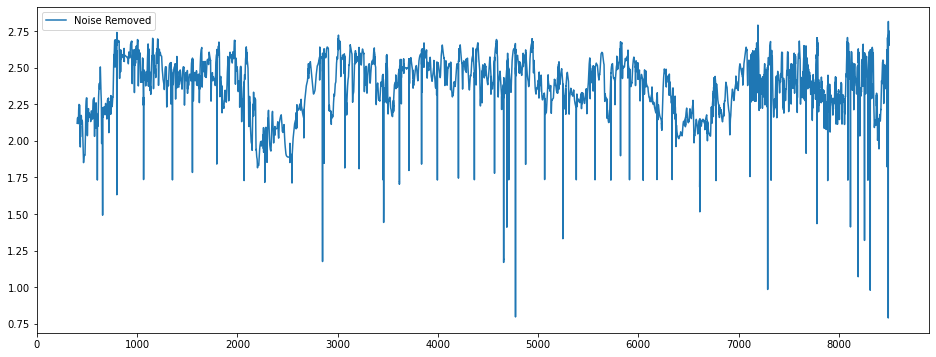

In [183]:
plt.figure(figsize = (16,6))
plt.plot(test_date,y_pred,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.show()

In [184]:
scaled_data


array([ 0.      , 20.      , 20.      , ...,  2.692715,  2.69274 ,
        2.692755])

In [185]:

scaled_data_1=scaled_data[-80971:]

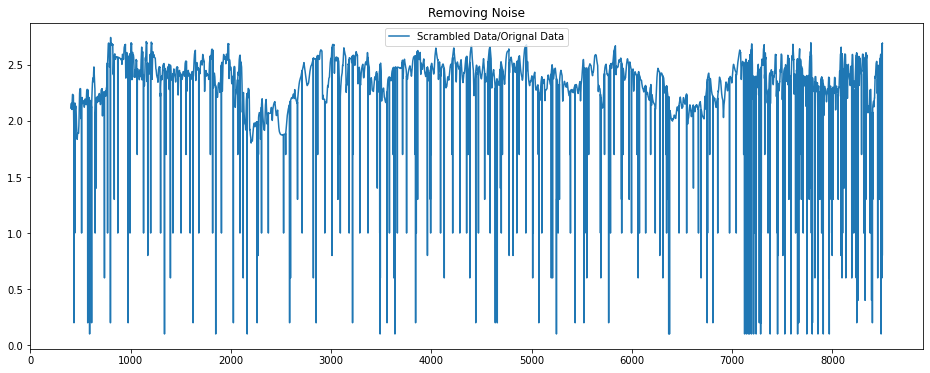

In [186]:
plt.figure(figsize = (16,6))
plt.plot(test_date,scaled_data_1, label="Scrambled Data/Orignal Data")
#plt.plot(test_date,y_pred,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.title("Removing Noise")
plt.show()

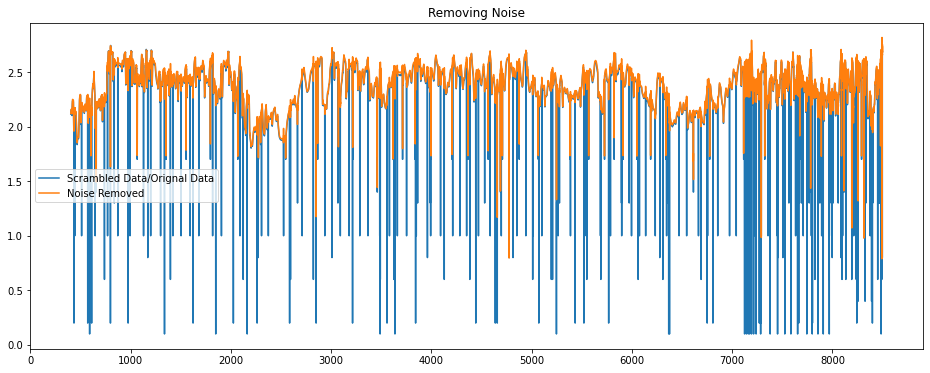

In [187]:

plt.figure(figsize = (16,6))
plt.plot(test_date,scaled_data_1, label="Scrambled Data/Orignal Data")
plt.plot(test_date,y_pred,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.title("Removing Noise")
plt.show()

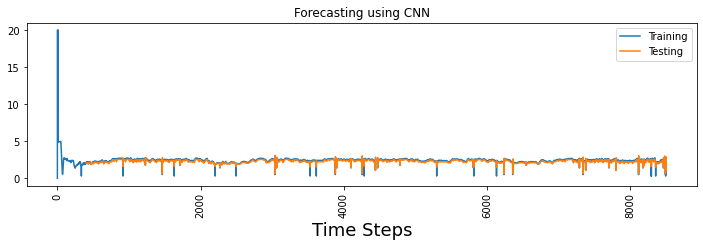

In [287]:
plt.figure(figsize = (12, 3))

plt.plot(dates,scaled_data,label="Training")
plt.plot(test_date,y_pred,label="Testing")
#plt.plot(test_date,y_test,label="actual ")

plt.xticks(rotation=90)
plt.xlabel('Time Steps',fontsize=18)
plt.legend()
plt.title("Forecasting using CNN")
plt.show()

# Processing of the DVL Beam two
****

In [189]:
# here I will try to process all the beam together, by altogether it is not at all improving, all work here to make it more good we need to have many more
# values to extract the values and need to have many workings :

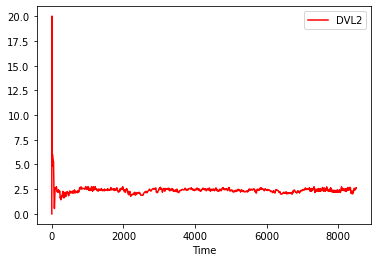

In [190]:
ax = plt.gca()

#df2.plot(kind='line',x='Time',y='DVL1', color='black', ax=ax)
df2.plot(kind='line',x='Time',y='DVL2', color='red', ax=ax)
#df2.plot(kind='line',x='Time',y='DVL3', color='green', ax=ax)
#df2.plot(kind='line',x='Time',y='DVL4', color='yellow', ax=ax)

plt.show()

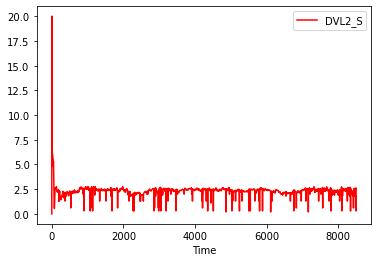

In [191]:
ax = plt.gca()

#df2.plot(kind='line',x='Time',y='DVL1_S', color='black', ax=ax)
df2.plot(kind='line',x='Time',y='DVL2_S', color='red', ax=ax)
#df2.plot(kind='line',x='Time',y='DVL3_S', color='green', ax=ax)
#df2.plot(kind='line',x='Time',y='DVL4_S', color='yellow', ax=ax)

plt.show()

In [192]:
#Need to improve the working and need
import numpy as np

In [193]:
t=df2['Time']
Label=df2['DVL2']
y=np.array( Label)
X=df2['DVL2_S']
X=np.array(X)
import numpy as np

In [194]:
def split_sequence(sequence, n_steps):
	X, z = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_z = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		z.append(seq_z)
	return array(X), array(z)

In [195]:
scaled_data=X

In [196]:
# define input sequence
raw_seq = X
# choose a number of time steps
n_steps = 20
# split into samples
X, z = split_sequence(raw_seq, n_steps)

In [197]:
X, z = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [198]:
X.shape

(84971, 20, 1)

In [199]:
len(Label)

84991

In [200]:
n_steps=20

In [201]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	Label, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		Label.append(seq_x)
		y.append(seq_y)
	return array(Label), array(y)

In [202]:
# define input sequence
raw_seq = Label
# choose a number of time steps
n_steps = 20
# split into samples
Label, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
Label = Label.reshape((Label.shape[0], Label.shape[1], n_features))

In [203]:
X_train  = np.array(X[:5000])
y_train = np.array(y[:5000])

X_test = np.array(X[4000:])
y_test = np.array(y[4000:])

In [204]:
print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (5000, 20, 1)
y_train size: (5000,)
X_test size: (80971, 20, 1)
y_test size: (80971,)


In [205]:
dates = df2['Time']
train_date = dates[:45000]
test_date = dates[-80971:]

In [206]:
X = X_train
y = y_train

In [207]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [208]:
history=model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
5000/5000 [==============================] - 1s 243us/step - loss: 0.4907
Epoch 2/100
5000/5000 [==============================] - 1s 182us/step - loss: 0.0797
Epoch 3/100
5000/5000 [==============================] - 1s 189us/step - loss: 0.1359
Epoch 4/100
5000/5000 [==============================] - 1s 175us/step - loss: 0.0367
Epoch 5/100
5000/5000 [==============================] - 1s 179us/step - loss: 0.0181
Epoch 6/100
5000/5000 [==============================] - 1s 200us/step - loss: 0.0150
Epoch 7/100
5000/5000 [==============================] - 1s 209us/step - loss: 0.0189
Epoch 8/100
5000/5000 [==============================] - 1s 180us/step - loss: 0.0190
Epoch 9/100
5000/5000 [==============================] - 1s 192us/step - loss: 0.0668
Epoch 10/100
5000/5000 [==============================] - 1s 188us/step - loss: 0.0782
Epoch 11/100
5000/5000 [==============================] - 1s 186us/step - loss: 0.0274
Epoch 12/100
5000/5000 [============================

In [209]:
#Prediction 
# demonstrate prediction
import math
y_pred=[]
for i in X_test:
    
    x_input = i
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    y_pred.append(float(yhat[0]))

# import numpy as np
# yp = list(np.around(np.array(y_pred),1))
# yt = list(np.around((y_test),1))
    
# y_pred = [ '%.1f' % elem for elem in y_pred ]
# y_test = [ '%.1f' % elem for elem in y_pred ]

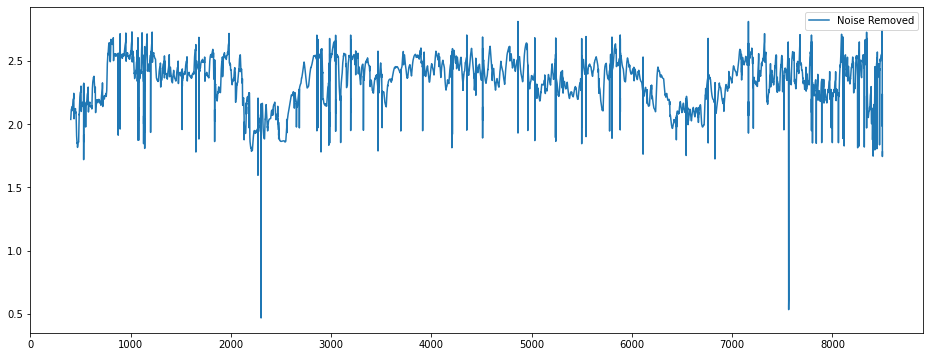

In [210]:
plt.figure(figsize = (16,6))
plt.plot(test_date,y_pred,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.show()

In [211]:
scaled_data


array([ 0. , 20. , 20. , ...,  1.8,  1.8,  1.8])

In [212]:

scaled_data_1=scaled_data[-80971:]

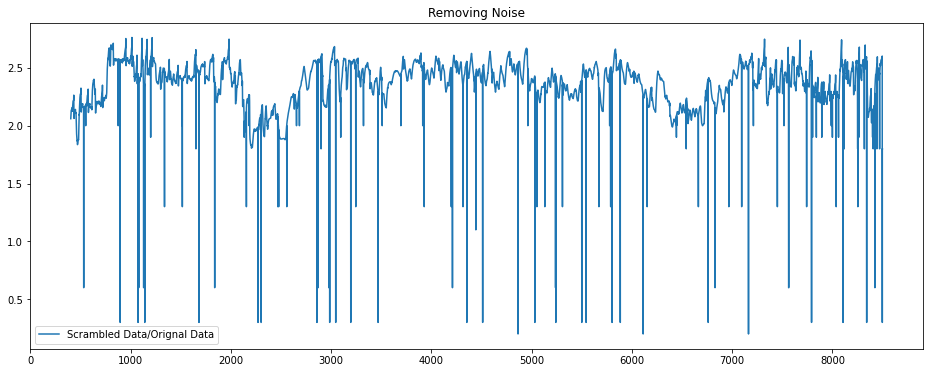

In [213]:
plt.figure(figsize = (16,6))
plt.plot(test_date,scaled_data_1, label="Scrambled Data/Orignal Data")
#plt.plot(test_date,y_pred,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.title("Removing Noise")
plt.show()

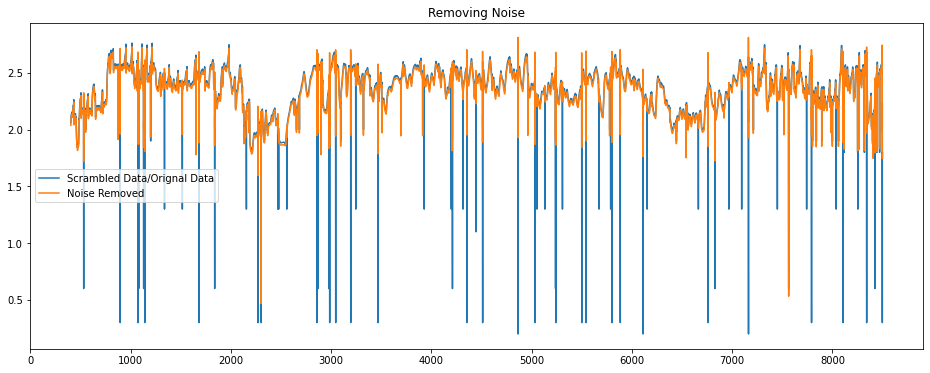

In [214]:
plt.figure(figsize = (16,6))
plt.plot(test_date,scaled_data_1, label="Scrambled Data/Orignal Data")
plt.plot(test_date,y_pred,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.title("Removing Noise")
plt.show()

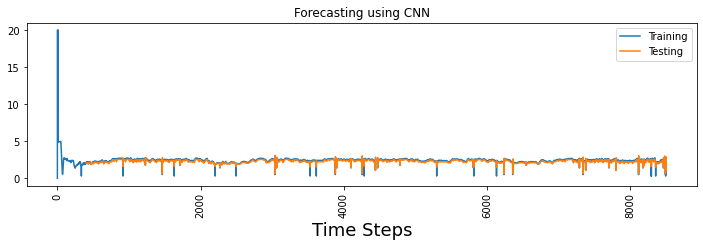

In [286]:
plt.figure(figsize = (12, 3))

plt.plot(dates,scaled_data,label="Training")
plt.plot(test_date,y_pred,label="Testing")
#plt.plot(test_date,y_test,label="actual ")

plt.xticks(rotation=90)
plt.xlabel('Time Steps',fontsize=18)
plt.legend()
plt.title("Forecasting using CNN")
plt.show()

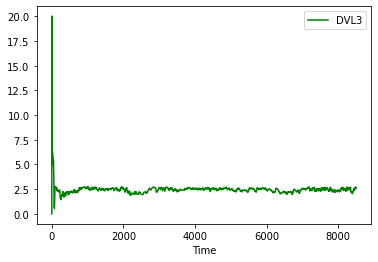

In [216]:
ax = plt.gca()

#df2.plot(kind='line',x='Time',y='DVL1', color='black', ax=ax)
#df2.plot(kind='line',x='Time',y='DVL2', color='red', ax=ax)
df2.plot(kind='line',x='Time',y='DVL3', color='green', ax=ax)
#df2.plot(kind='line',x='Time',y='DVL4', color='yellow', ax=ax)

plt.show()

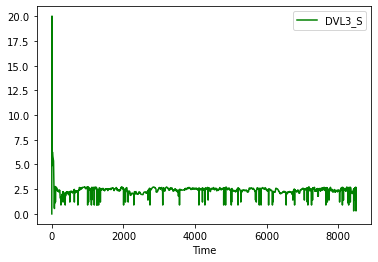

In [217]:
ax = plt.gca()

#df2.plot(kind='line',x='Time',y='DVL1_S', color='black', ax=ax)
#df2.plot(kind='line',x='Time',y='DVL2_S', color='red', ax=ax)
df2.plot(kind='line',x='Time',y='DVL3_S', color='green', ax=ax)
#df2.plot(kind='line',x='Time',y='DVL4_S', color='yellow', ax=ax)

plt.show()

In [218]:
t=df2['Time']
Label=df2['DVL3']
y=np.array( Label)
X=df2['DVL3_S']
X=np.array(X)
import numpy as np

In [219]:
def split_sequence(sequence, n_steps):
	X, z = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_z = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		z.append(seq_z)
	return array(X), array(z)

In [220]:
scaled_data=X

In [221]:
# define input sequence
raw_seq = X
# choose a number of time steps
n_steps = 20
# split into samples
X, z = split_sequence(raw_seq, n_steps)

In [222]:
X, z = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [223]:
n_steps=20

In [224]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	Label, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		Label.append(seq_x)
		y.append(seq_y)
	return array(Label), array(y)

In [225]:
# define input sequence
raw_seq = Label
# choose a number of time steps
n_steps = 20
# split into samples
Label, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
Label = Label.reshape((Label.shape[0], Label.shape[1], n_features))

In [226]:
X_train  = np.array(X[:5000])
y_train = np.array(y[:5000])

X_test = np.array(X[4000:])
y_test = np.array(y[4000:])

In [227]:
print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (5000, 20, 1)
y_train size: (5000,)
X_test size: (80971, 20, 1)
y_test size: (80971,)


In [228]:
dates = df2['Time']
train_date = dates[:45000]
test_date = dates[-80971:]

In [229]:
X = X_train
y = y_train

In [230]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [231]:
history=model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
5000/5000 [==============================] - 2s 308us/step - loss: 1.1337
Epoch 2/100
5000/5000 [==============================] - 1s 196us/step - loss: 0.2038
Epoch 3/100
5000/5000 [==============================] - 1s 187us/step - loss: 0.5428
Epoch 4/100
5000/5000 [==============================] - 1s 225us/step - loss: 0.1469
Epoch 5/100
5000/5000 [==============================] - 1s 215us/step - loss: 0.1129
Epoch 6/100
5000/5000 [==============================] - 1s 190us/step - loss: 0.1158
Epoch 7/100
5000/5000 [==============================] - 1s 208us/step - loss: 0.1390
Epoch 8/100
5000/5000 [==============================] - 1s 190us/step - loss: 0.1294
Epoch 9/100
5000/5000 [==============================] - 1s 204us/step - loss: 0.1027
Epoch 10/100
5000/5000 [==============================] - 1s 194us/step - loss: 0.0796
Epoch 11/100
5000/5000 [==============================] - 1s 182us/step - loss: 0.1643
Epoch 12/100
5000/5000 [============================

In [232]:
#Prediction 
# demonstrate prediction
import math
y_pred=[]
for i in X_test:
    
    x_input = i
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    y_pred.append(float(yhat[0]))

# import numpy as np
# yp = list(np.around(np.array(y_pred),1))
# yt = list(np.around((y_test),1))
    
# y_pred = [ '%.1f' % elem for elem in y_pred ]
# y_test = [ '%.1f' % elem for elem in y_pred ]

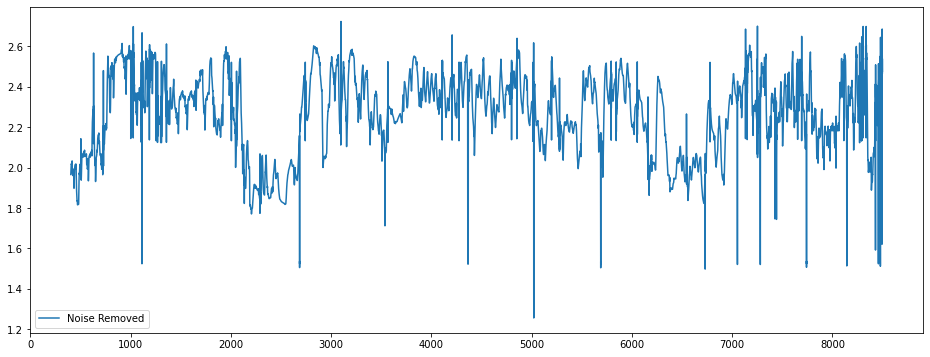

In [233]:
plt.figure(figsize = (16,6))
plt.plot(test_date,y_pred,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.show()

In [234]:

scaled_data_1=scaled_data[-80971:]

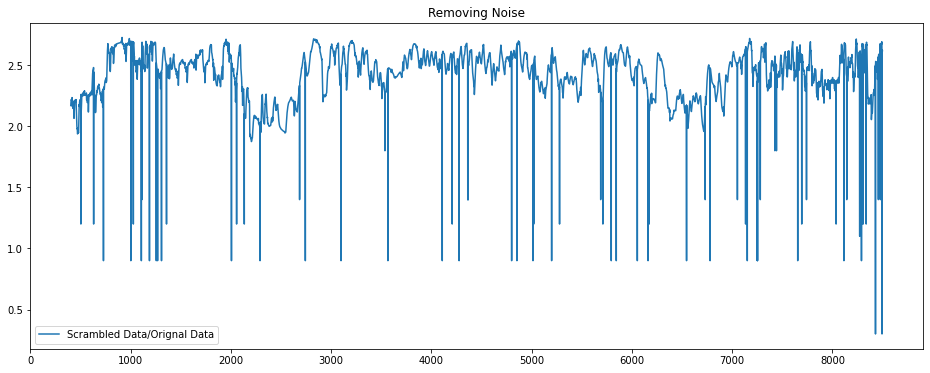

In [235]:
plt.figure(figsize = (16,6))
plt.plot(test_date,scaled_data_1, label="Scrambled Data/Orignal Data")
#plt.plot(test_date,y_pred,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.title("Removing Noise")
plt.show()

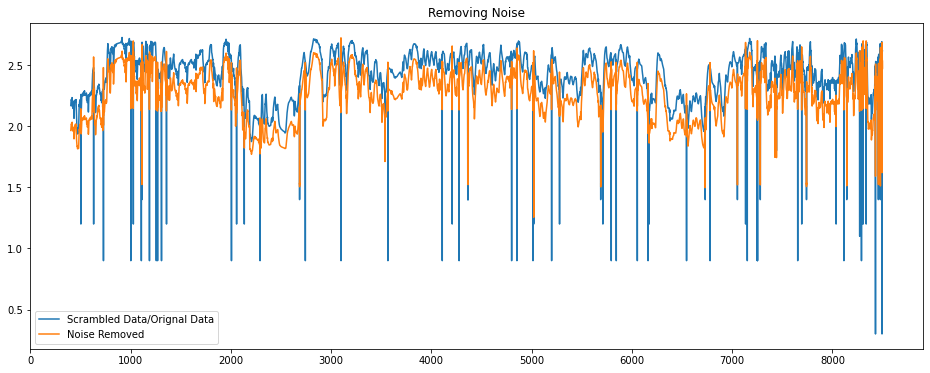

In [236]:
plt.figure(figsize = (16,6))
plt.plot(test_date,scaled_data_1, label="Scrambled Data/Orignal Data")
plt.plot(test_date,y_pred,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.title("Removing Noise")
plt.show()

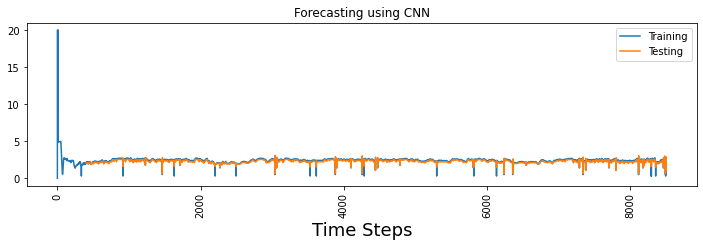

In [285]:
plt.figure(figsize = (12, 3))

plt.plot(dates,scaled_data,label="Training")
plt.plot(test_date,y_pred,label="Testing")
#plt.plot(test_date,y_test,label="actual ")

plt.xticks(rotation=90)
plt.xlabel('Time Steps',fontsize=18)
plt.legend()
plt.title("Forecasting using CNN")
plt.show()

In [ ]:
df

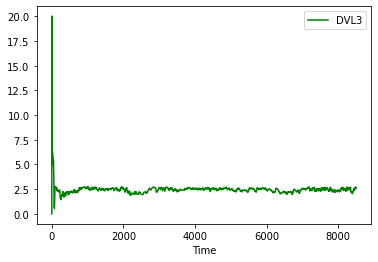

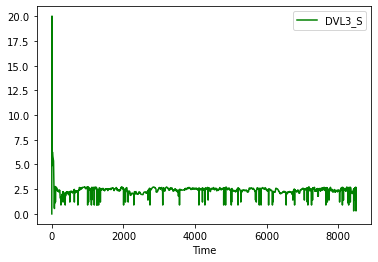

In [238]:
ax = plt.gca()

#df2.plot(kind='line',x='Time',y='DVL1', color='black', ax=ax)
#df2.plot(kind='line',x='Time',y='DVL2', color='red', ax=ax)
df2.plot(kind='line',x='Time',y='DVL3', color='green', ax=ax)
#df2.plot(kind='line',x='Time',y='DVL4', color='yellow', ax=ax)

plt.show()
ax = plt.gca()

#df2.plot(kind='line',x='Time',y='DVL1_S', color='black', ax=ax)
#df2.plot(kind='line',x='Time',y='DVL2_S', color='red', ax=ax)
df2.plot(kind='line',x='Time',y='DVL3_S', color='green', ax=ax)
#df2.plot(kind='line',x='Time',y='DVL4_S', color='yellow', ax=ax)

plt.show()




In [239]:
import numpy as np
t=df2['Time']
Label=df2['DVL3']
y=np.array( Label)
X=df2['DVL3_S']
X=np.array(X)

import numpy as np









In [240]:
def split_sequence(sequence, n_steps):
	X, z = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_z = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		z.append(seq_z)
	return array(X), array(z)

In [241]:


scaled_data = X

In [242]:

# define input sequence
raw_seq = X
# choose a number of time steps
n_steps = 20
# split into samples
X, z = split_sequence(raw_seq, n_steps)

In [243]:
X, z = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

n_steps=20

In [244]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	Label, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		Label.append(seq_x)
		y.append(seq_y)
	return array(Label), array(y)

In [245]:
 # define input sequence
raw_seq = Label
# choose a number of time steps
n_steps = 20
# split into samples
Label, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
Label = Label.reshape((Label.shape[0], Label.shape[1], n_features))

In [246]:

 











 








X_train  = np.array(X[:5000])
y_train = np.array(y[:5000])

X_test = np.array(X[4000:])
y_test = np.array(y[4000:])



print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))


X_train size: (5000, 20, 1)
y_train size: (5000,)
X_test size: (80971, 20, 1)
y_test size: (80971,)


In [247]:
dates = df2['Time']
train_date = dates[:45000]
test_date = dates[-80971:]



X = X_train
y = y_train

In [248]:
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')



history=model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
5000/5000 [==============================] - 1s 254us/step - loss: 1.2284
Epoch 2/100
5000/5000 [==============================] - 1s 178us/step - loss: 0.2426
Epoch 3/100
5000/5000 [==============================] - 1s 177us/step - loss: 0.2322
Epoch 4/100
5000/5000 [==============================] - 1s 180us/step - loss: 0.1657
Epoch 5/100
5000/5000 [==============================] - 1s 178us/step - loss: 0.1477
Epoch 6/100
5000/5000 [==============================] - 1s 179us/step - loss: 0.1208
Epoch 7/100
5000/5000 [==============================] - 1s 182us/step - loss: 0.1528
Epoch 8/100
5000/5000 [==============================] - 1s 182us/step - loss: 0.1400
Epoch 9/100
5000/5000 [==============================] - 1s 182us/step - loss: 0.2000
Epoch 10/100
5000/5000 [==============================] - 1s 194us/step - loss: 0.1013
Epoch 11/100
5000/5000 [==============================] - 1s 203us/step - loss: 0.1071
Epoch 12/100
5000/5000 [============================

In [249]:
#Prediction 
# demonstrate prediction
import math
y_pred=[]
for i in X_test:
    
    x_input = i
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    y_pred.append(float(yhat[0]))

# import numpy as np
# yp = list(np.around(np.array(y_pred),1))
# yt = list(np.around((y_test),1))
    
# y_pred = [ '%.1f' % elem for elem in y_pred ]
# y_test = [ '%.1f' % elem for elem in y_pred ]


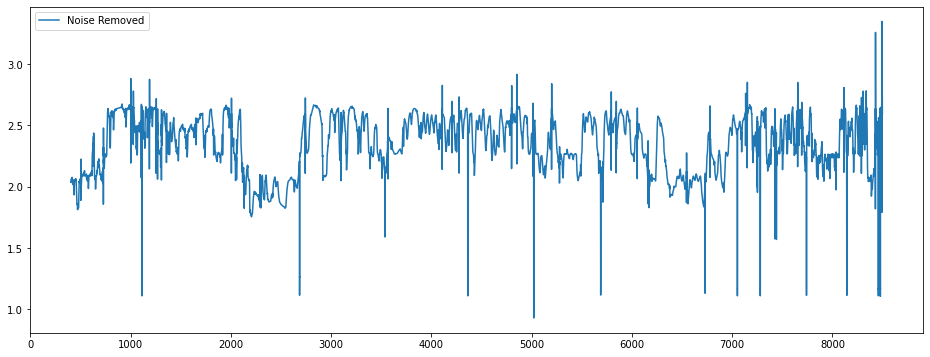

In [250]:

plt.figure(figsize = (16,6))
plt.plot(test_date,y_pred,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.show()

In [251]:
scaled_data


scaled_data_1=scaled_data[-80971:]

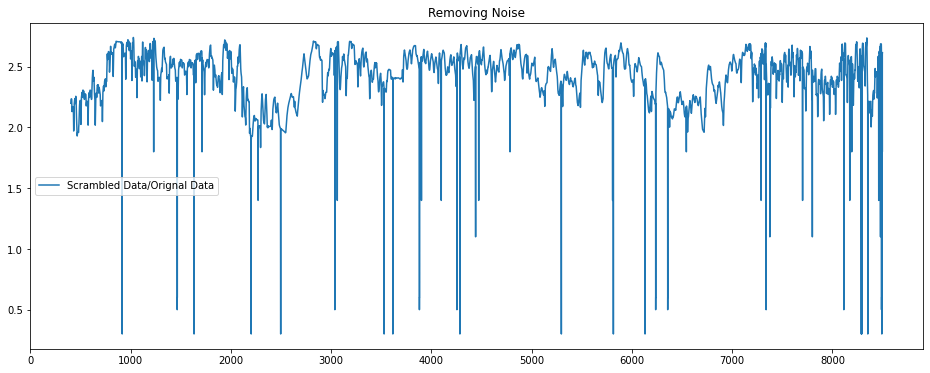

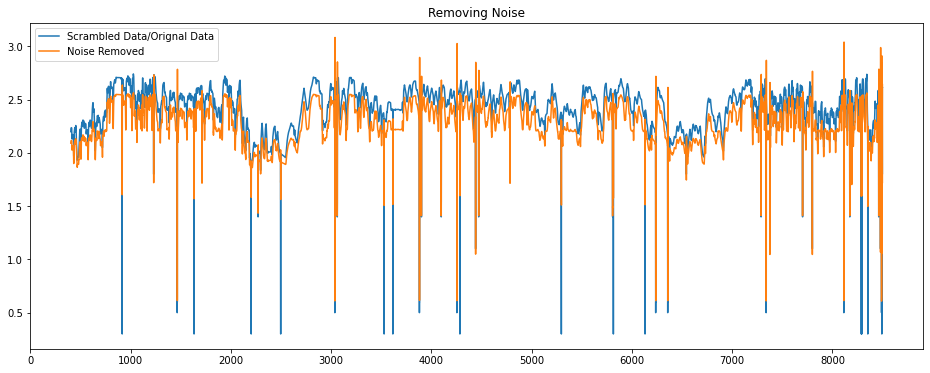

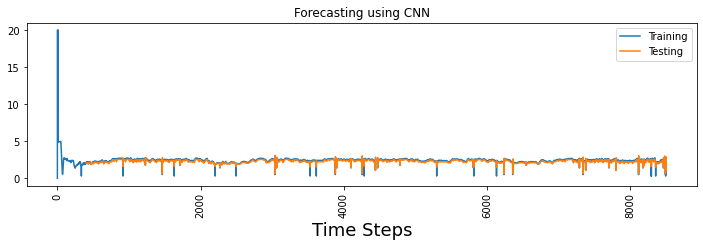

In [284]:
plt.figure(figsize = (16,6))
plt.plot(test_date,scaled_data_1, label="Scrambled Data/Orignal Data")
#plt.plot(test_date,y_pred,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.title("Removing Noise")
plt.show()



plt.figure(figsize = (16,6))
plt.plot(test_date,scaled_data_1, label="Scrambled Data/Orignal Data")
plt.plot(test_date,y_pred,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.title("Removing Noise")
plt.show()


plt.figure(figsize = (12, 3))

plt.plot(dates,scaled_data,label="Training")
plt.plot(test_date,y_pred,label="Testing")
#plt.plot(test_date,y_test,label="actual ")

plt.xticks(rotation=90)
plt.xlabel('Time Steps',fontsize=18)
plt.legend()
plt.title("Forecasting using CNN")
plt.show()


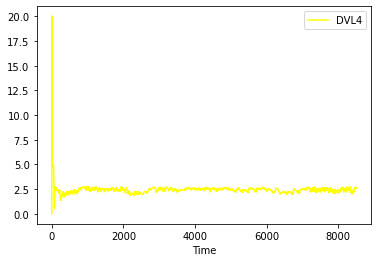

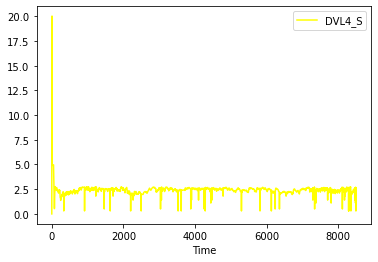

In [253]:
ax = plt.gca()

#df2.plot(kind='line',x='Time',y='DVL1', color='black', ax=ax)
#df2.plot(kind='line',x='Time',y='DVL2', color='red', ax=ax)
#df2.plot(kind='line',x='Time',y='DVL3', color='green', ax=ax)
df2.plot(kind='line',x='Time',y='DVL4', color='yellow', ax=ax)

plt.show()
ax = plt.gca()

#df2.plot(kind='line',x='Time',y='DVL1_S', color='black', ax=ax)
#df2.plot(kind='line',x='Time',y='DVL2_S', color='red', ax=ax)
#df2.plot(kind='line',x='Time',y='DVL3_S', color='green', ax=ax)
df2.plot(kind='line',x='Time',y='DVL4_S', color='yellow', ax=ax)

plt.show()
import numpy as np
t=df2['Time']
Label=df2['DVL4']
y=np.array( Label)
X=df2['DVL4_S']
X=np.array(X)

import numpy as np


In [254]:
def split_sequence(sequence, n_steps):
	X, z = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_z = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		z.append(seq_z)
	return array(X), array(z)
 

In [255]:
scaled_data=X

In [256]:
# define input sequence
raw_seq = X
# choose a number of time steps
n_steps = 20
# split into samples
X, z = split_sequence(raw_seq, n_steps)

In [257]:

X, z = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

n_steps=20

In [258]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	Label, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		Label.append(seq_x)
		y.append(seq_y)
	return array(Label), array(y)

In [259]:

 # define input sequence
raw_seq = Label
# choose a number of time steps
n_steps = 20
# split into samples
Label, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
Label = Label.reshape((Label.shape[0], Label.shape[1], n_features))

In [260]:
X_train  = np.array(X[:5000])
y_train = np.array(y[:5000])

X_test = np.array(X[4000:])
y_test = np.array(y[4000:])

In [261]:
print("X_train size: {}".format(X_train.shape))
print("y_train size: {}".format(y_train.shape))
print("X_test size: {}".format(X_test.shape))
print("y_test size: {}".format(y_test.shape))

X_train size: (5000, 20, 1)
y_train size: (5000,)
X_test size: (80971, 20, 1)
y_test size: (80971,)


In [262]:

dates = df2['Time']
train_date = dates[:45000]
test_date = dates[-80971:]

In [263]:

X = X_train
y = y_train

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(Conv1D(filters=64, kernel_size=2,padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')


In [264]:
history=model.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
5000/5000 [==============================] - 1s 246us/step - loss: 0.9869
Epoch 2/100
5000/5000 [==============================] - 1s 220us/step - loss: 0.1522
Epoch 3/100
5000/5000 [==============================] - 1s 185us/step - loss: 0.4132
Epoch 4/100
5000/5000 [==============================] - 1s 188us/step - loss: 0.1496
Epoch 5/100
5000/5000 [==============================] - 1s 215us/step - loss: 0.0905
Epoch 6/100
5000/5000 [==============================] - 1s 186us/step - loss: 0.1724
Epoch 7/100
5000/5000 [==============================] - 1s 184us/step - loss: 0.1032
Epoch 8/100
5000/5000 [==============================] - 1s 195us/step - loss: 0.0625
Epoch 9/100
5000/5000 [==============================] - 1s 188us/step - loss: 0.1400
Epoch 10/100
5000/5000 [==============================] - 1s 195us/step - loss: 0.1137
Epoch 11/100
5000/5000 [==============================] - 1s 212us/step - loss: 0.2246
Epoch 12/100
5000/5000 [============================

In [265]:


#Prediction 
# demonstrate prediction
import math
y_pred=[]
for i in X_test:
    
    x_input = i
    x_input = x_input.reshape((1, n_steps, n_features))
    yhat = model.predict(x_input, verbose=0)
    y_pred.append(float(yhat[0]))

# import numpy as np
# yp = list(np.around(np.array(y_pred),1))
# yt = list(np.around((y_test),1))
    
# y_pred = [ '%.1f' % elem for elem in y_pred ]
# y_test = [ '%.1f' % elem for elem in y_pred ]

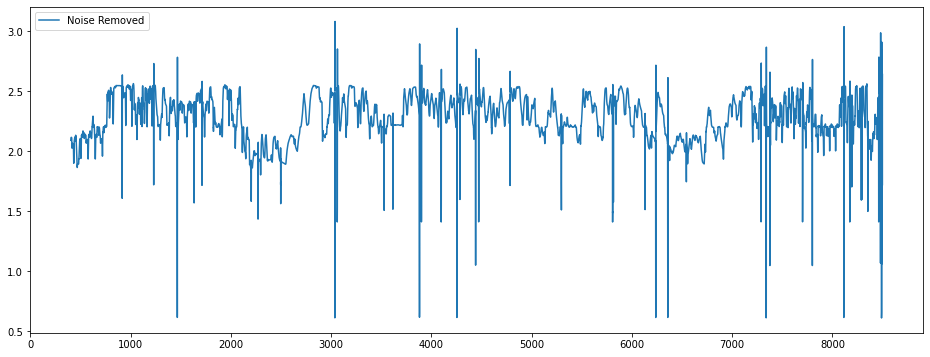

In [266]:
plt.figure(figsize = (16,6))
plt.plot(test_date,y_pred,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.show()

In [267]:
scaled_data

array([ 0.      , 20.      , 20.      , ...,  2.615951,  2.61597 ,
        2.615983])

In [268]:
scaled_data_1=scaled_data[-80971:]


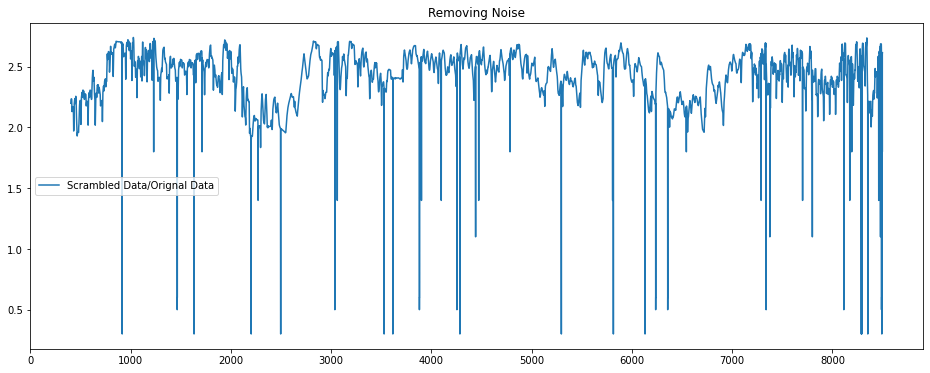

In [269]:

plt.figure(figsize = (16,6))
plt.plot(test_date,scaled_data_1, label="Scrambled Data/Orignal Data")
#plt.plot(test_date,y_pred,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.title("Removing Noise")
plt.show()

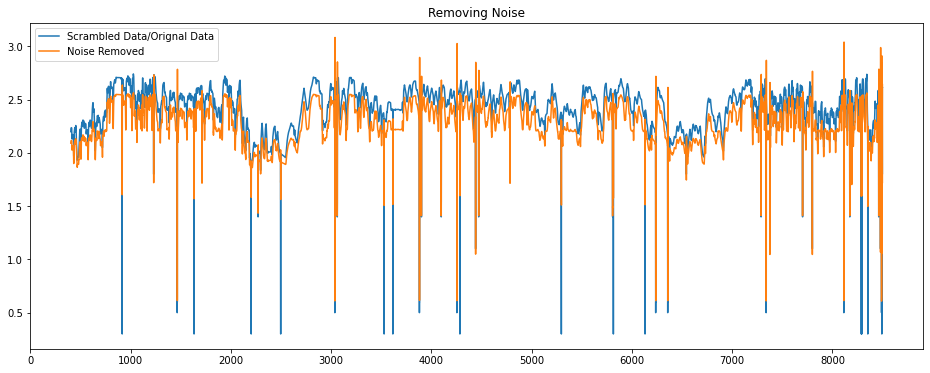

In [270]:
plt.figure(figsize = (16,6))
plt.plot(test_date,scaled_data_1, label="Scrambled Data/Orignal Data")
plt.plot(test_date,y_pred,label="Noise Removed")
#plt.plot(dates,scaled_data,label="Actual Data")
plt.legend()
plt.title("Removing Noise")
plt.show()

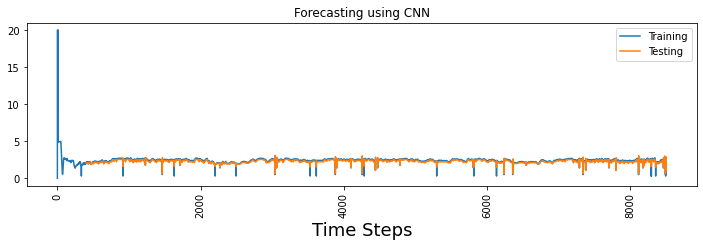

In [283]:
plt.figure(figsize = (12,3))

plt.plot(dates,scaled_data,label="Training")
plt.plot(test_date,y_pred,label="Testing")
#plt.plot(test_date,y_test,label="actual ")




plt.xticks(rotation=90)
plt.xlabel('Time Steps',fontsize=18)
plt.legend()
plt.title("Forecasting using CNN")
plt.show()

In [280]:
df2.head()

,Time,DVL1_S,DVL2_S,DVL3_S,DVL4_S,DVL1,DVL2,DVL3,DVL4,ROV6DOF,ROV6DOF.1,ROV6DOF.2,ROV6DOF.3,ROV6DOF.4,ROV6DOF.5,AutoHeading
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.1,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.2,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.3,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [281]:
df2.tail()

,Time,DVL1_S,DVL2_S,DVL3_S,DVL4_S,DVL1,DVL2,DVL3,DVL4,ROV6DOF,ROV6DOF.1,ROV6DOF.2,ROV6DOF.3,ROV6DOF.4,ROV6DOF.5,AutoHeading
84986,8498.5,2.692643,1.8,2.620548,2.615895,2.692643,2.628101,2.620548,2.615895,0.000980,-0.000342,0.0110,0.000017,-0.001540,-3.32,0.0646
84987,8498.6,2.692682,1.8,2.620243,2.615925,2.692682,2.629319,2.620243,2.615925,0.000990,-0.000342,0.0230,0.000031,-0.001380,-3.32,0.0643
84988,8498.7,2.692715,1.8,2.619866,2.615951,2.692715,2.630637,2.619866,2.615951,0.001010,-0.000342,0.0392,0.000051,-0.001220,-3.32,0.0641
84989,8498.8,2.692740,1.8,2.619450,2.615970,2.692740,2.631916,2.619450,2.615970,0.001040,-0.000342,0.0595,0.000075,-0.001060,-3.32,0.0632
84990,8498.9,2.692755,1.8,2.618994,2.615983,2.692755,2.633157,2.618994,2.615983,-0.000342,-0.000343,0.0835,0.000103,-0.000908,-3.32,0.0630
